In [6]:
import pandas as pd
import tensorflow_hub as hub
import numpy as np

In [7]:
csv_file_path = "Data/Kaggle/chatroom.csv"
chunksize = 10**2

In [8]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embed = hub.KerasLayer(module_url)

In [158]:
messages = []
for chunk in pd.read_csv(csv_file_path, chunksize=chunksize, usecols = ["id", "fromUser.displayName", "text", "sent", "fromUser.username"]):
    for index, row in chunk.iterrows():
        text = row["text"]
        username = row["fromUser.username"]        
        time = row["sent"]
        if len(text.split(" ")) >= 5:
            print(str(time) + "(" + str(username) + ")" + ": " + str(text))
            messages.append(text)
    break

2014-12-31T23:02:51.600Z(janetwalters008): That bullet proof coffee sounds insane.
2014-12-31T23:03:14.221Z(janetwalters008): That guy has huge eyes.
2014-12-31T23:03:20.182Z(sircharleswatson): @janetwalters008 It is. but it works. some people just can't handle the taste :P
2014-12-31T23:03:38.388Z(phgilliam): They guy that came up with the idea is kind of a joke though...
2014-12-31T23:03:42.433Z(odrisck): that sounds like torture actually :)
2014-12-31T23:04:03.702Z(janetwalters008): I might try it out for fun-just one bullet proof coffee that is.
2014-12-31T23:04:25.310Z(sircharleswatson): @phgilliam I agree. he's pretty extreme lol
2014-12-31T23:04:31.954Z(sircharleswatson): he's like the Bear Grylls of diets
2014-12-31T23:04:43.413Z(odrisck): I have zero intention of doing the whole diet bit of it, I just want the nommy creamy fatty coffee
2014-12-31T23:04:54.345Z(sircharleswatson): I can't help but laugh at my own joke/reference lol
2014-12-31T23:05:51.589Z(sircharleswatson): Any

In [13]:
message_embeddings = np.array(embed.call(messages))
N, D = np.shape(message_embeddings)
print("Dimensionality: {}\nNumber of messages: {}".format(D,N))

Dimensionality: 512
Number of messages: 70


In [161]:
topN = 3
threshold = 0.2
prob_matrix = np.zeros((N, N))
pastN = 10
for i, message in enumerate(message_embeddings):
    past_embeddings = message_embeddings[max(0, i-pastN):i]

    dotP = -message.dot(past_embeddings.T)
    dotPSorted = np.sort(dotP)[0:topN]
    dotPArg = np.argsort(dotP)[0:topN]
    prob_vector = np.zeros(N)
    for j, related_message_prob in enumerate(dotPSorted):
        print(past_embeddings[0])
        if abs(related_message_prob) > threshold:
            prob_vector[dotPArg[j]] = abs(related_message_prob)
    prob_matrix[i][:] = prob_vector

[ 0.05897941  0.04307271 -0.03476453 -0.00308286 -0.0085433   0.05170175
  0.05459968 -0.04736564  0.02399492 -0.00896659  0.01205065 -0.00012855
 -0.04710777 -0.08130641 -0.08992699 -0.02288018  0.00711083  0.01624624
  0.00072922  0.03761766 -0.01452305  0.00711121  0.02536505  0.05955456
 -0.03050372 -0.0684078   0.03684359 -0.08685701 -0.0272172   0.05829515
  0.05343436  0.00334053  0.0099708   0.03161524  0.0855503   0.03348902
 -0.08211905  0.01730784  0.02189302 -0.02885295  0.0492248   0.04976626
 -0.04606182  0.04123284 -0.03366508 -0.06612566 -0.02277762  0.04744371
 -0.01669251  0.04642464  0.0195859  -0.04005056  0.01879472  0.03876833
 -0.07151353  0.08124299  0.04941056  0.03455327 -0.07211959 -0.07484131
 -0.00320877 -0.01658536  0.0053251  -0.02924154  0.04164066  0.0162729
 -0.00826146  0.04673123  0.06070214  0.03670434 -0.0434555   0.041026
  0.06862113 -0.03604401  0.04706082 -0.03127324 -0.00958884  0.01759784
  0.00859187  0.06392358 -0.04030122  0.0141973  -0.00

  1.63245294e-02 -1.28754191e-02 -1.76300574e-02  1.48535604e-02]
[ 4.26105820e-02  6.03003614e-02  9.58668627e-03  4.08996493e-02
  4.42129672e-02  7.02034682e-02 -4.96599730e-03  1.04073612e-02
 -2.04428900e-02 -2.24495213e-03 -1.52113708e-02 -5.58642372e-02
 -1.57400370e-02  3.00862286e-02  3.01974341e-02 -1.00738958e-01
 -5.08703757e-04 -3.47000323e-02  5.46714999e-02 -7.57311061e-02
 -2.04110369e-02  4.14929492e-03  2.60189641e-03 -3.64794731e-02
 -1.13412254e-02 -2.07459927e-02  2.30666623e-02  7.15459585e-02
 -5.20750554e-03 -5.81256067e-03  1.05367962e-03  5.98012358e-02
  1.51373493e-02  2.49330644e-02  3.66200544e-02  4.57821228e-02
 -1.73740704e-02  2.02149805e-02 -7.12175891e-02 -3.90362628e-02
  7.03540593e-02 -1.73073765e-02 -4.18271199e-02  2.34562010e-02
 -5.33416383e-02 -9.91810299e-03 -9.76046473e-02  6.12718835e-02
  7.90521782e-03 -2.18360797e-02  8.77672285e-02 -5.83952218e-02
  5.37273139e-02 -1.95657443e-02  2.14917436e-02  6.01024851e-02
 -2.71440763e-02 -3.2200

 -5.62425144e-02 -3.47619653e-02  8.76212418e-02  1.45918841e-03]
[ 1.89799126e-02  1.98758915e-02 -1.66804641e-02 -6.54456243e-02
 -3.01244985e-02  3.27927917e-02  9.02881287e-03 -2.96801273e-02
 -2.87085609e-03  1.24074323e-02  5.73960617e-02 -5.47507517e-02
  4.21603536e-03 -5.39335422e-02 -2.12442875e-02 -2.64826789e-02
  4.58127521e-02 -7.12821912e-03 -3.52925323e-02 -5.95055446e-02
  3.01425401e-02 -2.40886584e-02  1.86478384e-02  6.64131343e-02
 -6.27112240e-02  4.72402163e-02 -3.55612971e-02 -1.69200208e-02
  3.31458338e-02  1.43783810e-02 -4.82110716e-02 -6.46223649e-02
 -3.67874987e-02 -7.67734193e-04  3.34424945e-03  3.34856175e-02
 -5.67706153e-02 -6.82992190e-02 -7.06642121e-02 -4.24431488e-02
  4.28063013e-02 -5.95018715e-02 -1.84415095e-02  1.03966162e-01
 -9.95746031e-02  2.56072059e-02 -4.29650731e-02  4.81864512e-02
 -1.91641636e-02  3.19015421e-02  9.54979733e-02 -6.75295740e-02
  1.84237100e-02 -3.85227986e-02 -1.25620794e-02 -3.46752293e-02
  7.19257519e-02 -4.8109

[ 0.05618311 -0.04604561 -0.04862247 -0.05619723  0.02128573  0.04039222
  0.00662268 -0.07805417  0.0548166  -0.0852572  -0.01754707 -0.03790397
 -0.0760067  -0.00975976 -0.00846578 -0.07264942  0.00315734 -0.03976664
 -0.02942816 -0.02720992 -0.06083849  0.08641509  0.0652146   0.02656591
  0.03590954 -0.04631143  0.08044738 -0.03400798 -0.01345539 -0.03028381
  0.05377161 -0.0104839   0.0319794  -0.01552784 -0.04812703 -0.01816659
 -0.03559512 -0.01571581  0.05305149 -0.00129346  0.0033565  -0.00037103
 -0.02394992  0.09254055 -0.01592728  0.04572596 -0.09838723 -0.03307562
 -0.01989056 -0.01208931 -0.02459439 -0.10288316  0.03402933 -0.05528906
  0.02209763  0.02425292  0.02596438 -0.07185584  0.07175519 -0.06091279
  0.00920376 -0.03619841  0.0405973  -0.08005123  0.00739052  0.06390835
  0.05975417 -0.04186111  0.06474895  0.07676061  0.03240567  0.01115105
  0.01585034 -0.05150556 -0.03581735  0.03601971  0.01460959 -0.00781776
 -0.04149137 -0.10284677 -0.05407389  0.04771117 -0

[-0.06740969 -0.09556293  0.0094714   0.02538424  0.04295171 -0.03503481
 -0.03763939 -0.02496664 -0.09765805 -0.05562522 -0.00880376  0.01392223
 -0.08294597  0.01278909  0.00155268  0.04347324  0.05066397  0.0042085
  0.05975563  0.02810296 -0.06032883  0.03681412 -0.05737838  0.0275079
 -0.03506722  0.00077592 -0.01708259  0.08584821 -0.00487082 -0.07282158
  0.05166222  0.0184301   0.03996736 -0.02744663 -0.02003979  0.03429717
  0.02210577 -0.04145886  0.06808835  0.03537052 -0.03327966 -0.03289669
 -0.01193105  0.07601464  0.01058207 -0.05403272 -0.01546142  0.01891296
  0.01113953 -0.03345499 -0.03286286 -0.03073497  0.02201736 -0.02724461
  0.05495535 -0.00652484  0.03861287 -0.01782771  0.06537096 -0.0254983
 -0.03117991 -0.05116167  0.01420523 -0.05876439 -0.01671057  0.03528344
  0.02329617  0.06296647  0.04943232  0.03666722  0.02706187  0.06812477
  0.02284038  0.0306237  -0.04306932  0.0273419   0.09734233 -0.03060231
  0.01780974  0.0850714   0.08173271  0.0226074   0.01

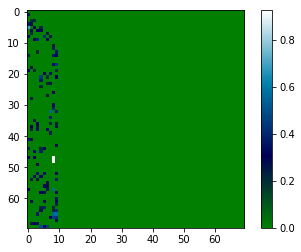

In [155]:
import matplotlib.pylab as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(prob_matrix, cmap=plt.cm.ocean)
plt.colorbar()
plt.show()

In [156]:
message_no = 41

indices = np.argwhere(prob_matrix[message_no][:] > threshold).flatten()
for index in indices:
    print(messages[index], prob_matrix[message_no][index])


print("\nQuery: " + messages[message_no])

That bullet proof coffee sounds insane. 0.38338226079940796
That guy has huge eyes. 0.26389461755752563

Query: @janetwalters008 Welcome to FCC Janet. Another Los Angeles gal.

